In [1]:
import sys
import os
sys.path.insert(0, "../../python")
sys.path.insert(0, "../../litos")

import cProfile
%load_ext line_profiler
from line_profiler import LineProfiler
%load_ext memory_profiler

import numpy as np
from beam.beams import electronbeam
import matplotlib.pyplot as plt
from beam import interactions

path = '/media/robert/Data_Storage/Data/Tests/Electron_Beam/'

In [2]:
params = {
    'name' : 'TestBeam',
    'path' : path,
    'load' : False,
    'N' : 10000,
    'gamma' : 20000,
    'emittance' : 5e-6,
    'betax' : 0.10,
    'betay' : 0.10,
    'alphax' : 0.0,
    'alphay' : 0.0,
    'sigmaz' : 5e-6,
    'dE' : 0.01
}

beam = electronbeam.GaussianElectronBeam(params)

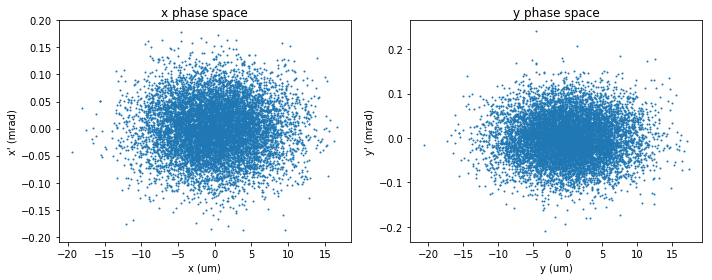

In [3]:
ptcls = beam.ptcls

plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.scatter(ptcls[:, 0]*1e6, ptcls[:, 1]*1e3, 1)
plt.title('x phase space')
plt.xlabel('x (um)')
plt.ylabel("x' (mrad)")
plt.subplot(122)
plt.scatter(ptcls[:, 2]*1e6, ptcls[:, 3]*1e3, 1)
plt.title('y phase space')
plt.xlabel('y (um)')
plt.ylabel("y' (mrad)")

plt.tight_layout()
plt.show()

In [4]:
class plasma():
    z = np.linspace(0, 2, 3500, dtype='double')
    ne = np.ones(3500, dtype='double')*0.1
    def dgammadz(n):
        return 0.0

interactions.electron_plasma(beam, plasma, 10)

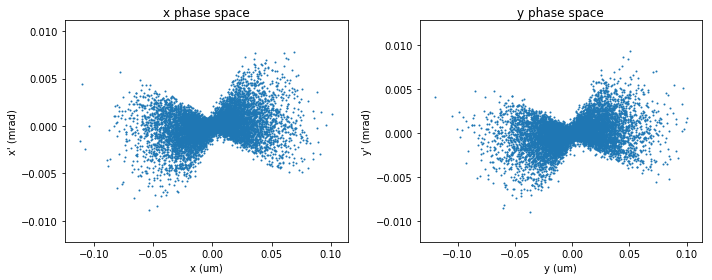

In [5]:
ptcls = np.array(beam.ptcls)

plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.scatter(ptcls[:, 0]*1e6, ptcls[:, 1]*1e3, 1)
plt.title('x phase space')
plt.xlabel('x (um)')
plt.ylabel("x' (mrad)")
plt.subplot(122)
plt.scatter(ptcls[:, 2]*1e6, ptcls[:, 3]*1e3, 1)
plt.title('y phase space')
plt.xlabel('y (um)')
plt.ylabel("y' (mrad)")

plt.tight_layout()
plt.show()

In [8]:
cProfile.run('interactions.electron_plasma(beam, plasma, 100)')

         24435 function calls in 0.549 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
       70    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:989(_handle_fromlist)
     3499    0.000    0.000    0.000    0.000 <ipython-input-4-c15b37ffb144>:4(dgammadz)
        1    0.000    0.000    0.549    0.549 <string>:1(<module>)
     1365    0.000    0.000    0.001    0.000 <string>:12(__new__)
       35    0.000    0.000    0.089    0.003 electronbeam.py:79(save_ptcls)
       35    0.000    0.000    0.018    0.001 electronbeam.py:86(save_z)
       70    0.000    0.000    0.000    0.000 format.py:171(_check_version)
       70    0.000    0.000    0.000    0.000 format.py:176(magic)
       70    0.000    0.000    0.000    0.000 format.py:223(dtype_to_descr)
       70    0.000    0.000    0.000    0.000 format.py:255(header_data_from_array_1_0)
       70    0.001    0.000    0.016    0.000 format.py:282(_write_array